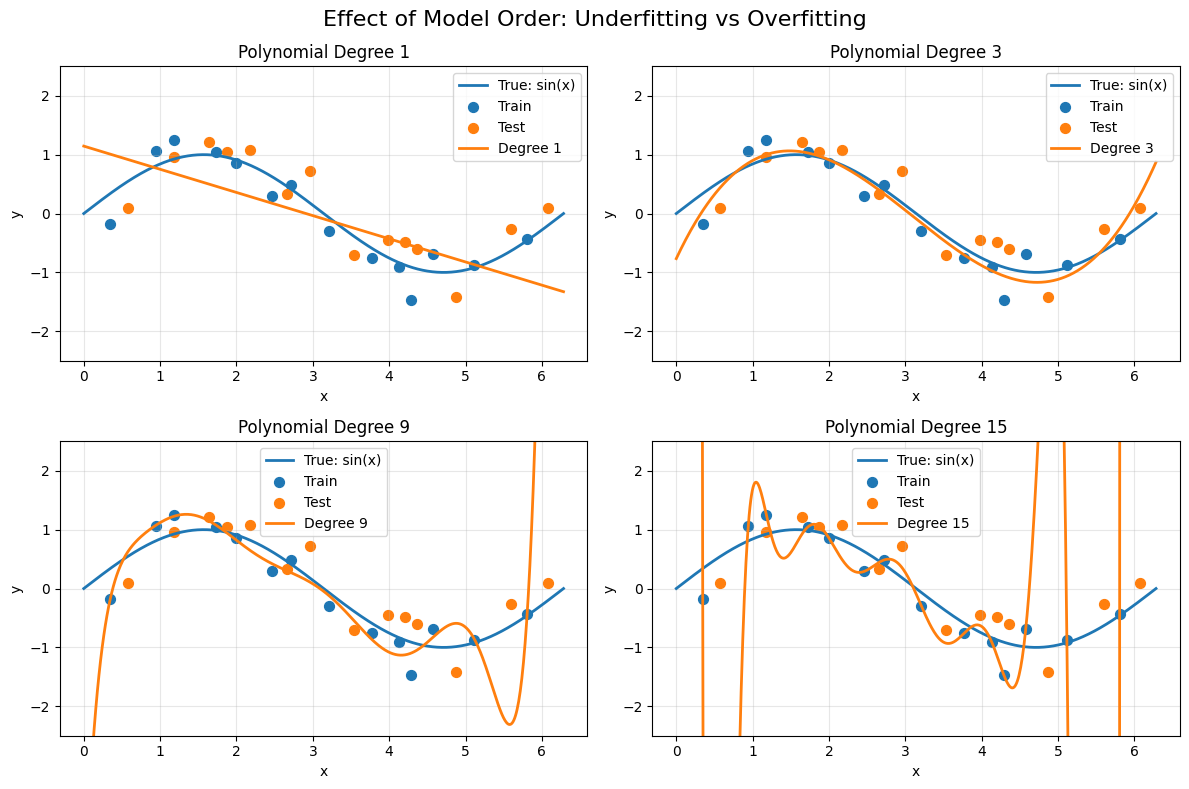

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Generate noisy sine data
# -------------------------
rng = np.random.default_rng(2)
n = 28

x = np.sort(rng.uniform(0, 2*np.pi, size=n))
y = np.sin(x) + rng.normal(0, 0.30, size=n)

# Train/test split
train = (np.arange(n) % 2 == 0)
test  = ~train

xtr, ytr = x[train], y[train]
xte, yte = x[test],  y[test]

# Smooth grid
xg = np.linspace(0, 2*np.pi, 600)
yg_true = np.sin(xg)

# Polynomial degrees to compare
degrees = [1, 3, 9, 15]

# -------------------------
# Plot settings
# -------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, d in enumerate(degrees):
    ax = axes[i]

    # Stable polynomial fitting (better than np.polyfit for high degrees)
    p = np.polynomial.Polynomial.fit(xtr, ytr, deg=d, domain=[0, 2*np.pi])

    ax.plot(xg, yg_true, linewidth=2, label="True: sin(x)")
    ax.scatter(xtr, ytr, s=50, label="Train")
    ax.scatter(xte, yte, s=50, label="Test")
    ax.plot(xg, p(xg), linewidth=2, label=f"Degree {d}")

    ax.set_title(f"Polynomial Degree {d}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, alpha=0.3)

    # Keep the same y-limits for fair comparison
    ax.set_ylim(-2.5, 2.5)

    ax.legend()

plt.suptitle("Effect of Model Order: Underfitting vs Overfitting", fontsize=16)
plt.tight_layout()
plt.savefig("model_order_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


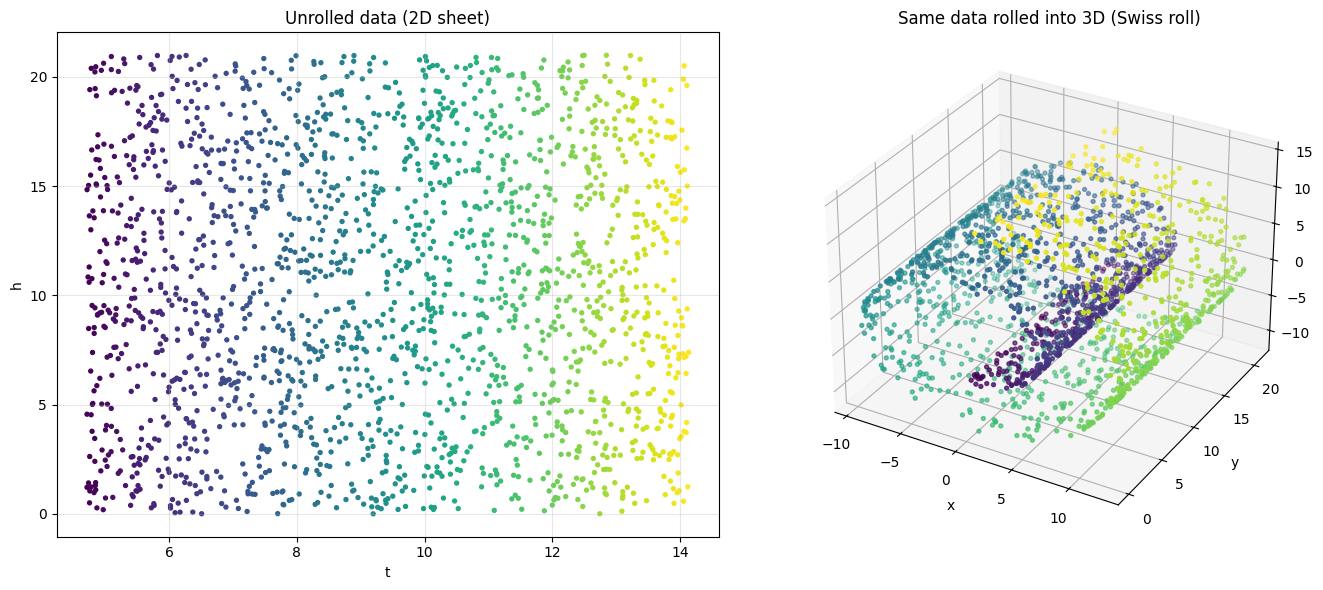

In [17]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

N = 2000

# 2D sheet coordinates (this is the REAL intrinsic structure)
t = 1.5 * np.pi * (1 + 2 * rng.random(N))   # like horizontal coordinate
h = 21 * rng.random(N)                      # like vertical coordinate

# Swiss roll embedding into 3D
x = t * np.cos(t)
y = h
z = t * np.sin(t)

# --------------------------
# Plot: unrolled vs rolled
# --------------------------
fig = plt.figure(figsize=(14, 6))

# Unrolled 2D plot
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(t, h, c=t, s=8)
ax1.set_title("Unrolled data (2D sheet)")
ax1.set_xlabel("t")
ax1.set_ylabel("h")
ax1.grid(True, alpha=0.3)

# Rolled 3D plot
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(x, y, z, c=t, s=8)
ax2.set_title("Same data rolled into 3D (Swiss roll)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.tight_layout()
plt.savefig("swiss_roll_unrolled_vs_rolled.png", dpi=300, bbox_inches="tight")
plt.show()


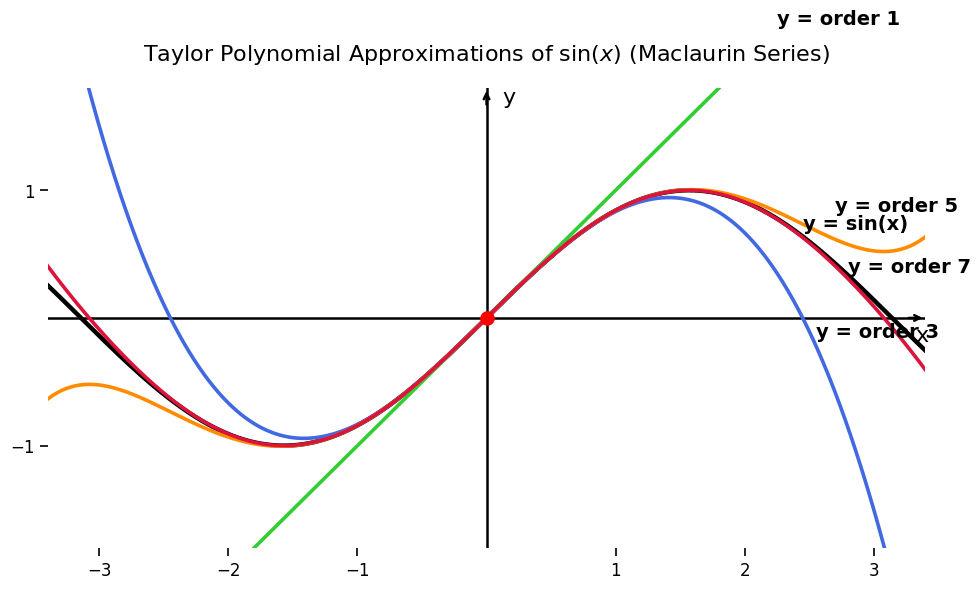

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------------------------
# True function and Taylor polynomials
# ---------------------------
def sin(x):
    return np.sin(x)

def taylor_sin_maclaurin(x, order):
    y = np.zeros_like(x, dtype=float)
    for k in range((order // 2) + 1):
        power = 2*k + 1
        if power > order:
            break
        y += ((-1)**k) * x**power / math.factorial(power)
    return y

# ---------------------------
# Domain
# ---------------------------
x = np.linspace(-3.5, 3.5, 2500)
y_true = sin(x)

orders = [1, 3, 5, 7]
ys = {n: taylor_sin_maclaurin(x, n) for n in orders}

# ---------------------------
# Plot setup (textbook style)
# ---------------------------
fig, ax = plt.subplots(figsize=(10, 6))

# Remove default spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Limits
ax.set_xlim(-3.4, 3.4)
ax.set_ylim(-1.8, 1.8)

# Draw axis lines
ax.plot([-3.4, 3.4], [0, 0], color="black", linewidth=1.8)
ax.plot([0, 0], [-1.8, 1.8], color="black", linewidth=1.8)

# Arrowheads
ax.annotate("", xy=(3.4, 0), xytext=(3.25, 0),
            arrowprops=dict(arrowstyle="->", lw=1.8, color="black"))
ax.annotate("", xy=(0, 1.8), xytext=(0, 1.65),
            arrowprops=dict(arrowstyle="->", lw=1.8, color="black"))

# Axis labels
ax.text(3.32, -0.18, "x", fontsize=16)
ax.text(0.12, 1.68, "y", fontsize=16)

# ---------------------------
# Plot curves
# ---------------------------
ax.plot(x, y_true, linewidth=3.2, color="black", label="sin(x)")

colors = {
    1: "limegreen",
    3: "royalblue",
    5: "darkorange",
    7: "crimson"
}

for n in orders:
    ax.plot(x, ys[n], linewidth=2.6, color=colors[n])

# Mark expansion point
ax.scatter([0], [0], s=90, color="red", zorder=10)

# ---------------------------
# Helper function to place labels nicely
# ---------------------------
def place_label(x0, y_curve, text, dx=0.15, dy=0.0, fontsize=14):
    idx = np.argmin(np.abs(x - x0))
    y0 = y_curve[idx]
    ax.text(x0 + dx, y0 + dy, text, fontsize=fontsize, weight="bold")

# ---------------------------
# Labels (manually chosen to avoid overlap)
# ---------------------------
place_label(2.1, ys[1], "y = order 1", dx=0.15, dy=0.2)
place_label(2.4, ys[3], "y = order 3", dx=0.15, dy=-0.25)
place_label(2.55, ys[5], "y = order 5", dx=0.15, dy=0.15)
place_label(2.65, ys[7], "y = order 7", dx=0.15, dy=-0.10)
place_label(2.3, y_true, "y = sin(x)", dx=0.15, dy=-0.05)

# ---------------------------
# Ticks (minimal textbook style)
# ---------------------------
ax.set_xticks([-3, -2, -1, 1, 2, 3])
ax.set_yticks([-1, 1])

ax.tick_params(axis="both", which="both", length=6, width=1.2, labelsize=12)

# No grid, no legend
ax.grid(False)

# Title
ax.set_title("Taylor Polynomial Approximations of $\\sin(x)$ (Maclaurin Series)", fontsize=16, pad=20)

plt.tight_layout()
plt.savefig("taylor_textbook_style.png", dpi=300, bbox_inches="tight")
plt.show()
